# Logistic Regression

### --- Importing require libaries
### --- Gather data
### --- Data preprocessimg
### --- Select best model
### --- Split data into target(y) and target_feature(x)
### --- Fit data (train model on our data)
### --- Predict on test data(actually validate data) 
### --- Model evaluation
### --- Visualization


In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [128]:
df=pd.read_csv('candy-data.csv')
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [129]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [130]:
df.tail()
df.drop(columns=['competitorname'],axis=1,inplace=True)

In [131]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [132]:
df.isnull().sum()   

chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [133]:
df_duplicate=df.duplicated().sum()
df_duplicate

np.int64(0)

In [134]:
df.drop_duplicates(inplace=True)

In [135]:
y=df['chocolate']
x=df.drop(columns=['chocolate'],axis=1)

In [136]:
x.columns

Index(['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer',
       'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent',
       'winpercent'],
      dtype='object')

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# random_state=42,0,143 use to get same split every time

In [138]:
x_test.shape

(17, 11)

In [139]:
df

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [140]:
y_train.value_counts()
temp=x_train+y_train.to_frame(name='chocolate')
# temp?
# y_train

sns.countplot(x="chocolate",data=temp,palette='Set1')
plt.title('chocolate vs non-chocolate')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_28300\1526085120.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="chocolate",data=df,palette='Set1')


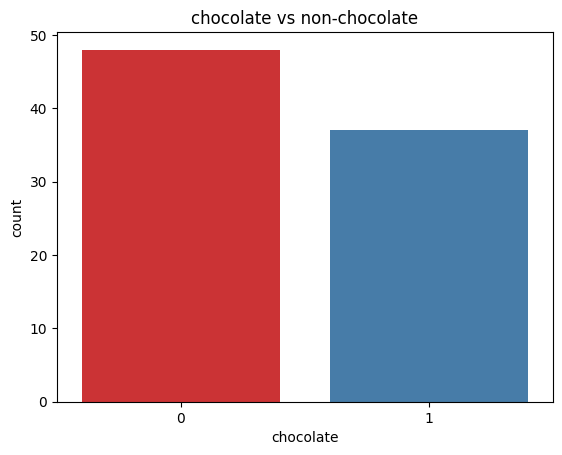

In [141]:
sns.countplot(x="chocolate",data=df,palette='Set1')
plt.title('chocolate vs non-chocolate')
plt.show()

In [142]:
# import pandas as pd

# # Example Series
# data = pd.Series([10, 20, 30], index=['a', 'b', 'c'])

# # Convert Series to DataFrame
# df = data.to_frame(name='ch')

# print(df)


In [143]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [ ]:
from sklearn import metrics

cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix


array([[10,  0],
       [ 1,  6]])

In [146]:
%matplotlib inline

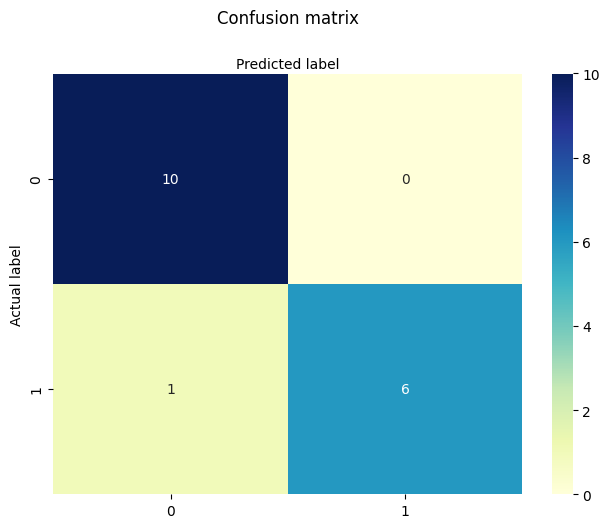

accuaracy: 0.9411764705882353
precision: 1.0


In [148]:
class_names=[0,1] # name  of classes
fig,ax=plt.subplots()

tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)

plt.yticks(tick_marks,class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print('accuaracy:',metrics.accuracy_score(y_test,y_pred))
print('precision:',metrics.precision_score(y_test,y_pred))

    


In [147]:
print('accuaracy:',metrics.accuracy_score(y_test,y_pred))
print('precision:',metrics.precision_score(y_test,y_pred))
print('recall:',metrics.recall_score(y_test,y_pred))

accuaracy: 0.9411764705882353
precision: 1.0
recall: 0.8571428571428571


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np